<a href="https://colab.research.google.com/github/Bikomwangi/Supermarket.Marketing.Strategies/blob/main/Part_1%262_PCA%26Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Part 1**

# Problem Statement

This project entails reducing the dataset to a low dimensional dataset using the PCA as well as Feature Selection and providing insights gained from the analysis.

# Loading The Data

In [ ]:
# loading the data
url<- "http://bit.ly/CarreFourDataset"
data<- read.csv(url)

# Checking The Data

In [ ]:
head(data)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [ ]:
tail(data, 5)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
996,233-67-5758,C,Normal,Male,Health and beauty,40.35,1,2.0175,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,42.3675
997,303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10,48.6900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,1022.4900
998,727-02-1313,A,Member,Male,Food and beverages,31.84,1,1.5920,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,33.4320
999,347-56-2442,A,Normal,Male,Home and lifestyle,65.82,1,3.2910,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,69.1110
1000,849-09-3807,A,Member,Female,Fashion accessories,88.34,7,30.9190,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6,649.2990


In [ ]:
colnames(data)

[1] "Invoice.ID"              "Branch"                 
 [3] "Customer.type"           "Gender"                 
 [5] "Product.line"            "Unit.price"             
 [7] "Quantity"                "Tax"                    
 [9] "Date"                    "Time"                   
[11] "Payment"                 "cogs"                   
[13] "gross.margin.percentage" "gross.income"           
[15] "Rating"                  "Total"

In [ ]:
str(data)

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : chr  "A" "C" "A" "A" ...
 $ Customer.type          : chr  "Member" "Normal" "Normal" "Member" ...
 $ Gender                 : chr  "Female" "Female" "Male" "Male" ...
 $ Product.line           : chr  "Health and beauty" "Electronic accessories" "Home and lifestyle" "Health and beauty" ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Time                   : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ Payment                : chr  "Ewallet" "Cash" "Credit card" "Ewallet" ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ g

In [ ]:
summary(data)

  Invoice.ID           Branch          Customer.type         Gender         
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 Product.line         Unit.price       Quantity          Tax         
 Length:1000        Min.   :10.08   Min.   : 1.00   Min.   : 0.5085  
 Class :character   1st Qu.:32.88   1st Qu.: 3.00   1st Qu.: 5.9249  
 Mode  :character   Median :55.23   Median : 5.00   Median :12.0880  
                    Mean   :55.67   Mean   : 5.51   Mean   :15.3794  
                    3rd Qu.:77.94   3rd Qu.: 8.00   3rd Qu.:22.4453  
                    Max.   :99.96   Max. 

In [ ]:
dim(data)

[1] 1000   16

# Data cleaning

In [ ]:
colSums(sapply(data, is.na))

Invoice.ID                  Branch           Customer.type 
                      0                       0                       0 
                 Gender            Product.line              Unit.price 
                      0                       0                       0 
               Quantity                     Tax                    Date 
                      0                       0                       0 
                   Time                 Payment                    cogs 
                      0                       0                       0 
gross.margin.percentage            gross.income                  Rating 
                      0                       0                       0 
                  Total 
                      0

In [ ]:
# removing some columns
library(lubridate)
data1 <- data[,-1]
data1$Date <- as.Date(data1$Date, "%m/%d/%y")
year(data1$Date) <- 2019
head(data1)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<date>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A,Member,Female,Health and beauty,74.69,7,26.1415,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,C,Normal,Female,Electronic accessories,15.28,5,3.8200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,A,Member,Male,Health and beauty,58.22,8,23.2880,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,A,Normal,Male,Sports and travel,86.31,7,30.2085,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,C,Normal,Male,Electronic accessories,85.39,7,29.8865,2019-03-25,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [ ]:
cat("The number of duplicated rows are", nrow(data) - nrow(unique(data)))

The number of duplicated rows are 0

In [ ]:
# Checking for Anomalies in the the Factor levels using levels() function
levels(data$payment)
levels(data$gender)
levels(data$branch)
levels(data$cust_type)
levels(data$gender)


NULL

NULL

NULL

NULL

NULL

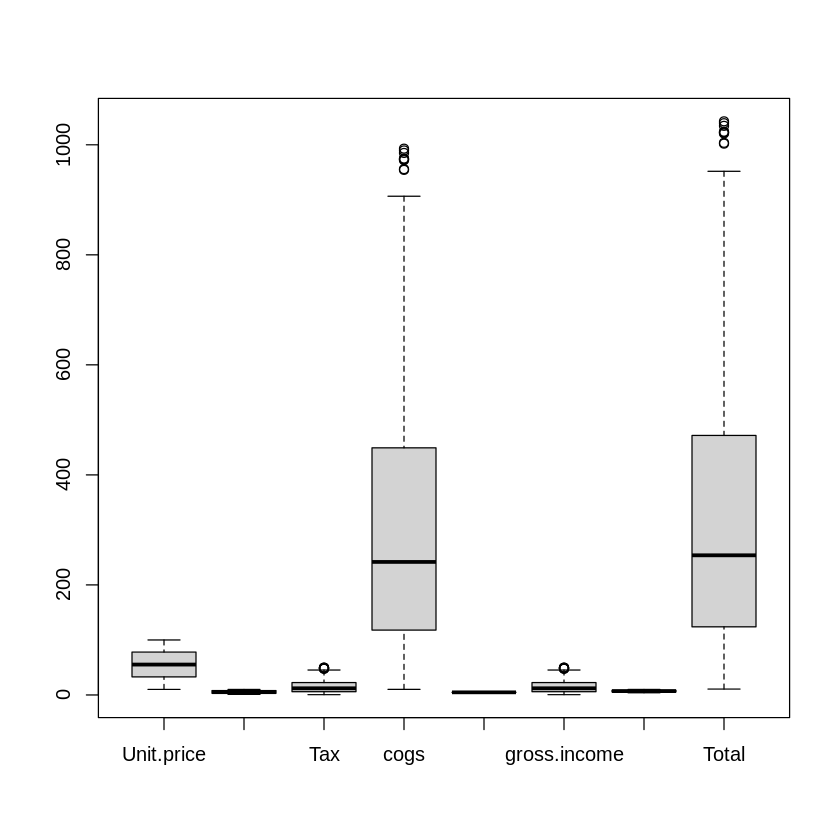

In [ ]:
# Checking for Outliers in numerical columns using boxplot
boxplot(data[,c(6:8,12:16)]) # Summary statistics will tell us if these points are outliers
col = 2

From our summary statistics, the max values of tax, cogs, gross_income and total are 49.65,993.0, 49.65 and 1042.65 respectively. This indicates they are not outliers since a client may have bought a large quantity of items.

# Exploratory Data Analysis

# Univariate analysis

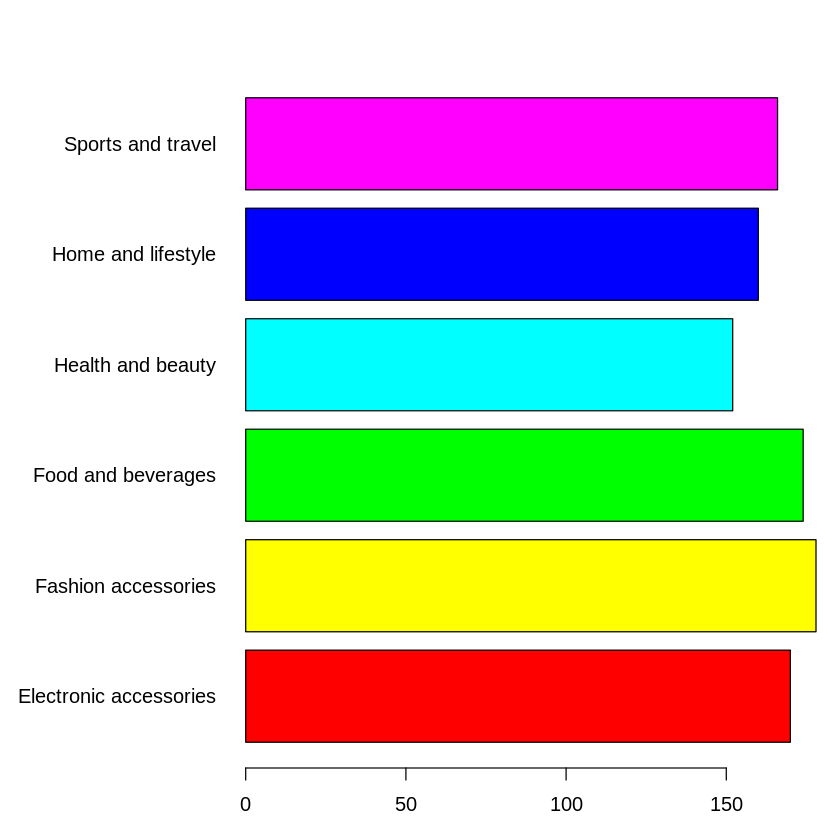

In [ ]:
# Barplots
par(mar=c(3, 10, 3, 1))
product_barplot <- table(data$Product.line)
barplot(product_barplot,las=1, horiz=TRUE,col=rainbow(length(unique(data$Product.line))))

Insights;
- From the barplot, there are more customers for Fashion Accessories followed by customers for Food & Beverages

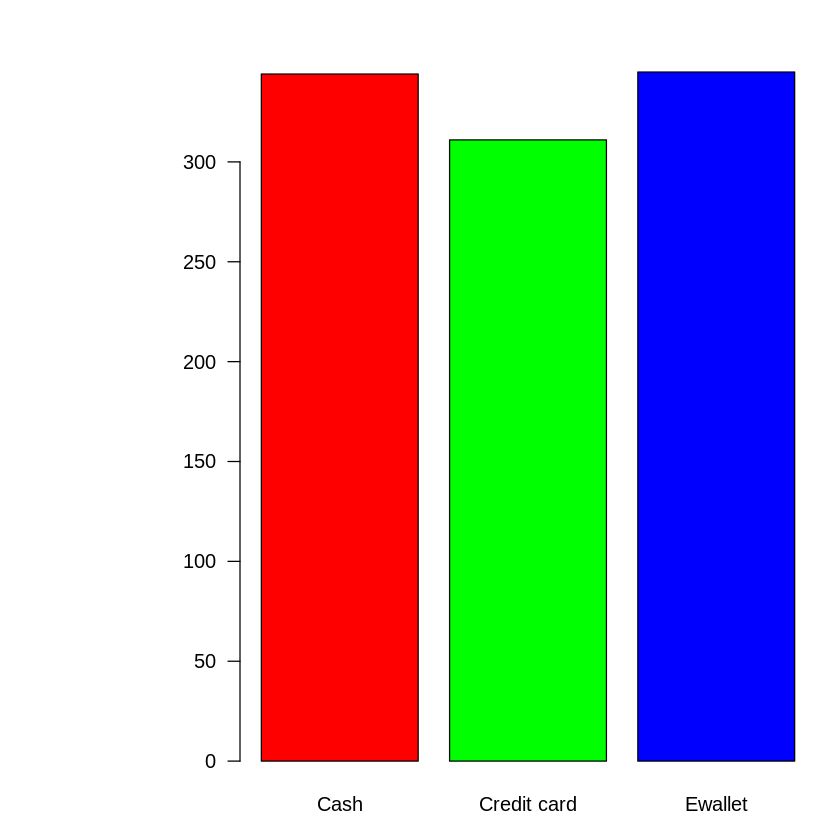

In [ ]:
# barplot
par(mar=c(3, 10, 3, 1))
payment_barplot <- table(data$Payment)
barplot(payment_barplot,las=1, horiz=FALSE,col=rainbow(length(unique(data$Payment))))

Insights;
- most customers pay through cash and ewallets

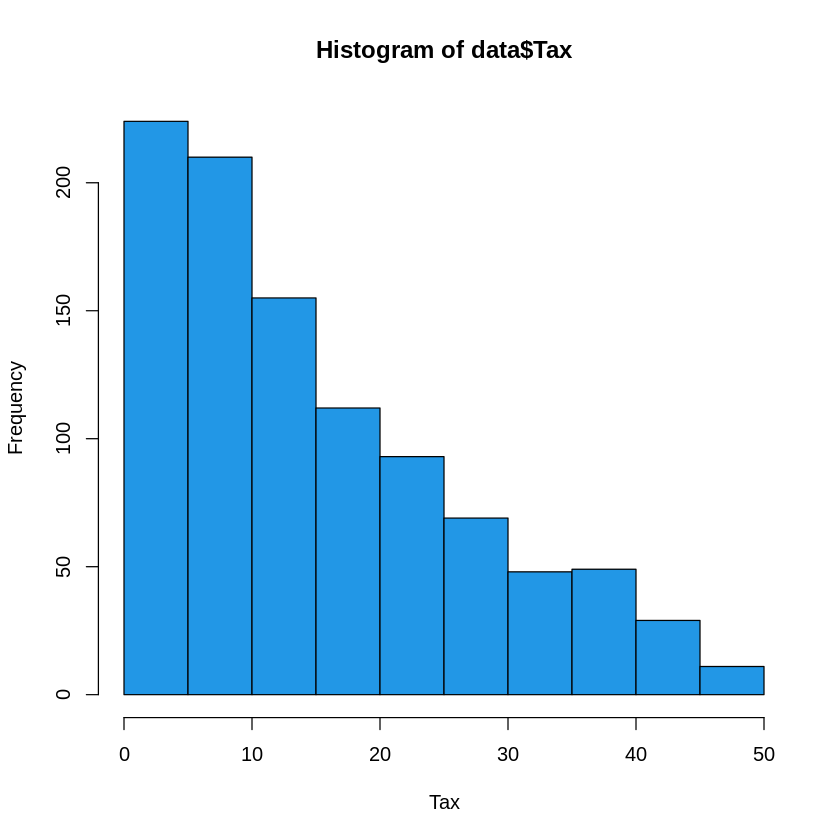

In [ ]:
# histogram showing the distribution of Tax
hist(data$Tax,
        xlab = "Tax",
        col = 4,
        ylab = "Frequency")

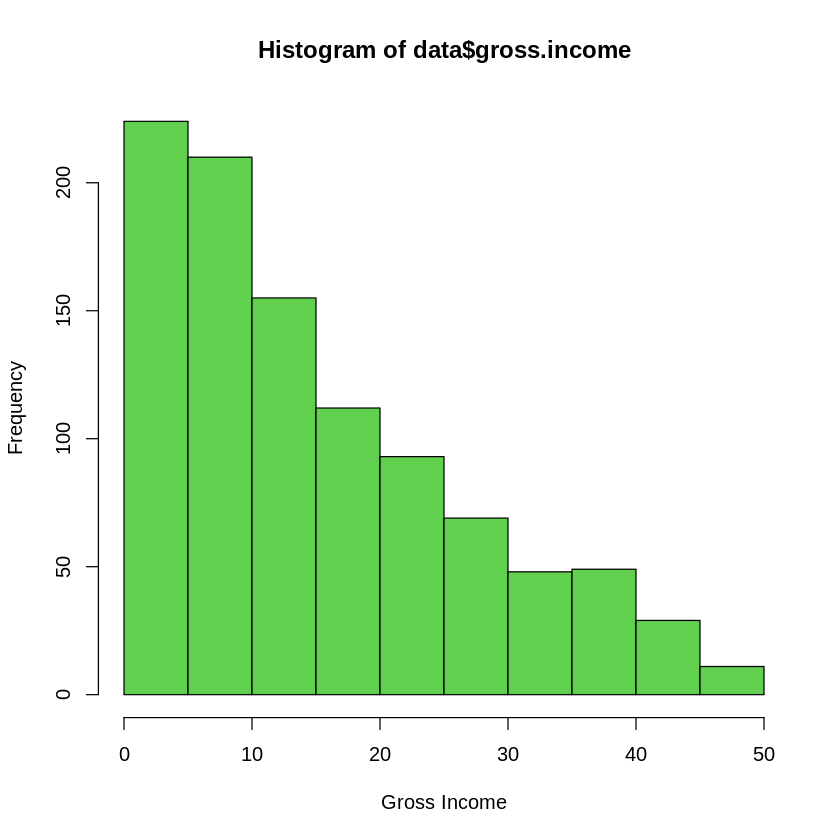

In [ ]:
# histogram of Gross Income
hist(data$gross.income,
        xlab = "Gross Income",
        col = 3,
        ylab = "Frequency")

# Bivariate analysis

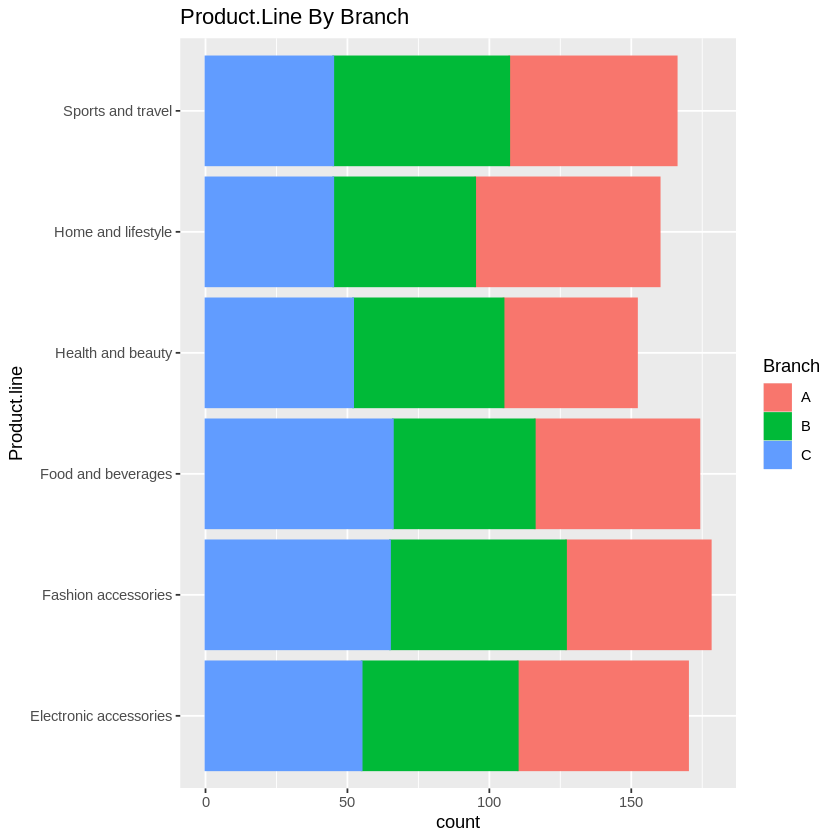

In [ ]:
# Combined Bar Charts
# Using geom_bar() to plot a combined bar chart for product line and branch
comb.charts <- ggplot(data, aes(x=Product.line, fill=Branch, color=Branch)) +
geom_bar() + labs(title="Product.Line By Branch") + coord_flip()
print(comb.charts)


Insights:
- Branch C is performing very well in terms of beverages and fashion accessories
- B sells more sports and travel and fashion accesorries

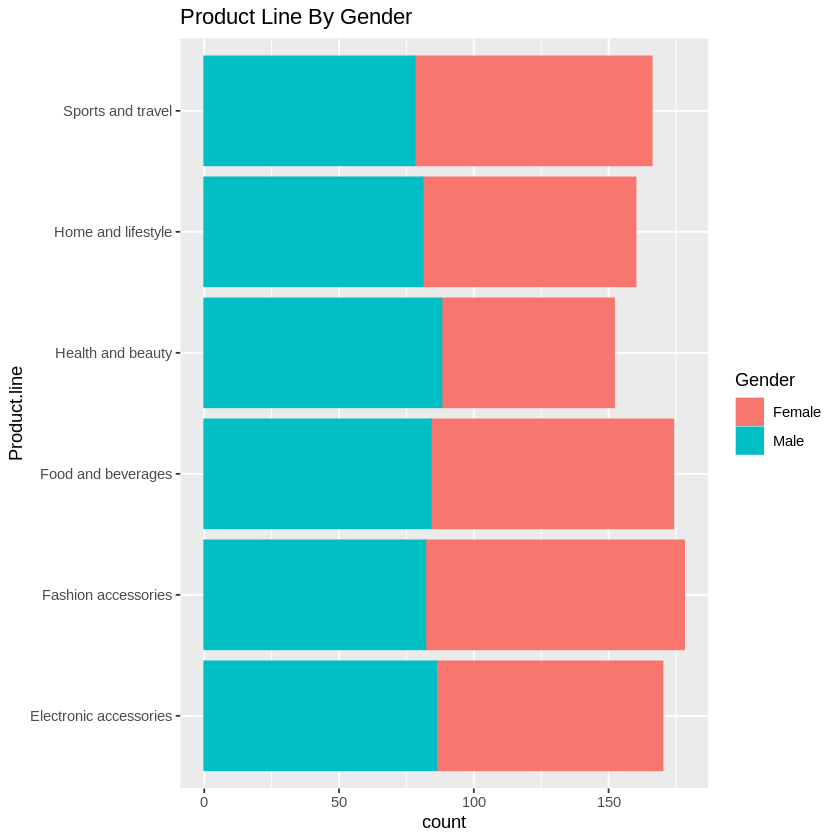

In [ ]:
# Using geom_bar() to plot a combined bar chart for product line and gender
prod.combchart <- ggplot(data, aes(x=Product.line, fill=Gender, color=Gender)) +
geom_bar() + labs(title="Product Line By Gender") + coord_flip()
print(prod.combchart)


Insight;
- most males purchase health and beauty and electronic accessories
However, the difference across all the categories is not significant

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,Unit.price,Quantity,Tax,cogs,gross.income,Rating
Unit.price,1.000000000,0.01077756,0.6339621,0.6339621,0.6339621,-0.008777507
Quantity,0.010777564,1.00000000,0.7055102,0.7055102,0.7055102,-0.015814905
Tax,0.633962089,0.70551019,1.0000000,1.0000000,1.0000000,-0.036441705
cogs,0.633962089,0.70551019,1.0000000,1.0000000,1.0000000,-0.036441705
gross.income,0.633962089,0.70551019,1.0000000,1.0000000,1.0000000,-0.036441705
Rating,-0.008777507,-0.01581490,-0.0364417,-0.0364417,-0.0364417,1.000000000


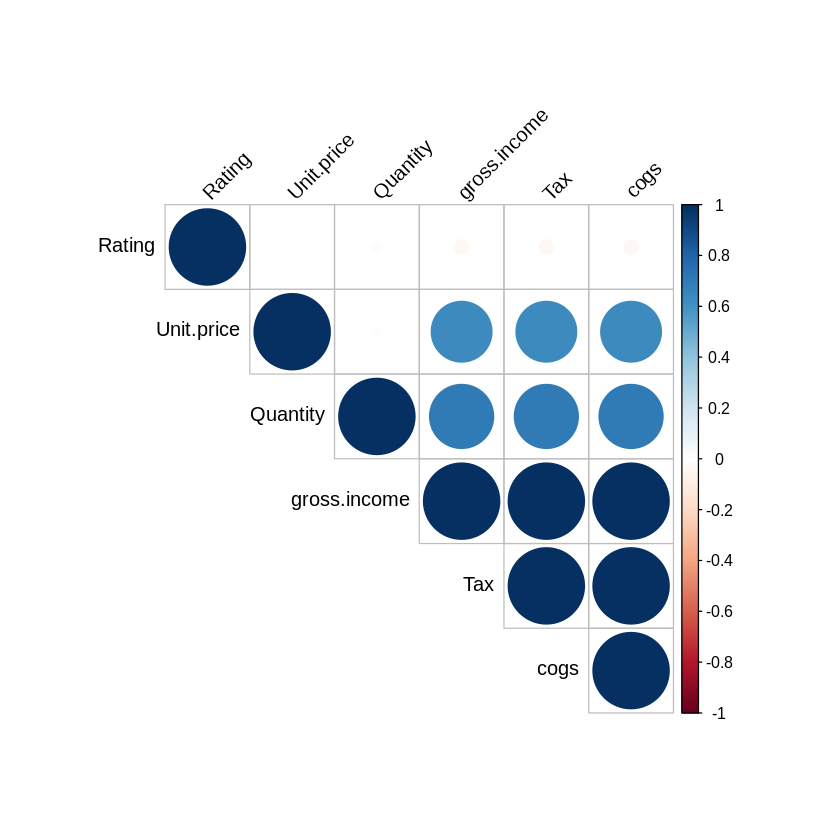

In [ ]:
install.packages("corrplot")

library(corrplot)
# numerical variables
num_var <- data[,c(6:8,12,14:15)]
# corr of numerical variables
corr <- cor(all_num_vars, method = "pearson")
corr

# plotting a heatmap of the above corrs
corrplot(corr, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)



insights;
- tax and income are highly correlated
- cogs is highly corr with tax and gross income


Invoice.ID                  Branch           Customer.type 
                      0                       0                       0 
                 Gender            Product.line              Unit.price 
                      0                       0                       0 
               Quantity                     Tax                    Date 
                      0                       0                       0 
                   Time                    cogs gross.margin.percentage 
                      0                       0                       0 
           gross.income                  Rating                   Total 
                      0                       0                       0

  Invoice.ID           Branch          Customer.type         Gender         
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 Product.line         Unit.price       Quantity          Tax         
 Length:1000        Min.   :10.08   Min.   : 1.00   Min.   : 0.5085  
 Class :character   1st Qu.:32.88   1st Qu.: 3.00   1st Qu.: 5.9249  
 Mode  :character   Median :55.23   Median : 5.00   Median :12.0880  
                    Mean   :55.67   Mean   : 5.51   Mean   :15.3794  
                    3rd Qu.:77.94   3rd Qu.: 8.00   3rd Qu.:22.4453  
                    Max.   :99.96   Max. 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




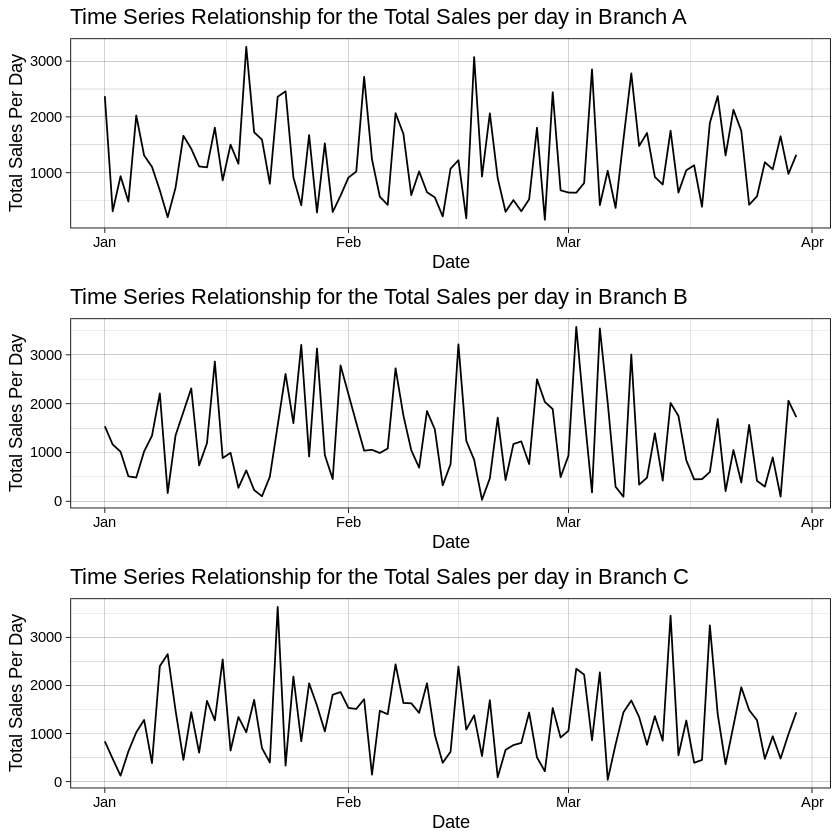

In [ ]:
# time series line plot
library(lubridate)
data2 <- data[,-11]
data2$Date <- as.Date(data2$Date, "%m/%d/%y")
year(data2$Date) <- 2019
sapply(data2, function(x) sum(is.na(x)))
install.packages("gridExtra")

library(gridExtra)
# converting data type to date for branch A
A <- data2 %>% filter(Branch == "A")
total_A <- data.frame(xtabs(formula = Total~Date, data = A))
total_A$Date <- as.Date(total_A$Date)
# ''' branch B
B <- data2 %>% filter(Branch == "B")
total_B <- data.frame(xtabs(formula = Total~Date, data = B))
total_B$Date <- as.Date(total_B$Date)
# ''' branch C
C <- data2 %>% filter(Branch == "C")
total_C <- data.frame(xtabs(formula = Total~Date, data = C))
total_C$Date <- as.Date(total_C$Date)
# plotting the line plots
plot1 <- ggplot(data = total_A, mapping = aes(x = Date, y = Freq))+ geom_line()+
theme_linedraw()+ ggtitle("Time Series Relationship for the Total Sales per day in Branch A")+ xlab("Date")+ ylab("Total Sales Per Day")
plot2 <- ggplot(data = total_B, mapping = aes(x = Date, y = Freq))+ geom_line()+
theme_linedraw()+ ggtitle("Time Series Relationship for the Total Sales per day in Branch B")+ xlab("Date")+ ylab("Total Sales Per Day")
plot3 <- ggplot(data = total_C, mapping = aes(x = Date, y = Freq))+ geom_line()+
theme_linedraw()+ ggtitle("Time Series Relationship for the Total Sales per day in Branch C")+ xlab("Date")+ ylab("Total Sales Per Day")

grid.arrange(plot1, plot2, plot3)



```
# This is formatted as code
```

# Multivariate Analysis (PCA)

**Part 1 - PCA**

In [ ]:
# We do not include total because thats our predictor variable
data <- (data[,c(6:8,12,14:15)])
head(data)

,Unit.price,Quantity,Tax,cogs,gross.income,Rating
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,74.69,7,26.1415,522.83,26.1415,9.1
2,15.28,5,3.8200,76.40,3.8200,9.6
3,46.33,7,16.2155,324.31,16.2155,7.4
4,58.22,8,23.2880,465.76,23.2880,8.4
5,86.31,7,30.2085,604.17,30.2085,5.3
6,85.39,7,29.8865,597.73,29.8865,4.1


In [ ]:
# We then pass all_num_vars to the prcomp() function. We also set two arguments, center and scale, 
data.pca <- prcomp(data, center = TRUE, scale. = TRUE)
summary(data.pca)

Importance of components:
                          PC1    PC2    PC3    PC4       PC5       PC6
Standard deviation     1.9817 1.0002 0.9939 0.2909 2.293e-16 1.124e-16
Proportion of Variance 0.6545 0.1667 0.1646 0.0141 0.000e+00 0.000e+00
Cumulative Proportion  0.6545 0.8213 0.9859 1.0000 1.000e+00 1.000e+00

From the summary above, we obtain 6 Principal components and PC1 explains 65.45% of the total variance
This means 65.45% of the total information in the dataset is encapsulated by the first Pricipal Component
PC2 and PC3 explain 16.67% and 16.46% of the total variance/information in the dataset.
PC5 to PC6 are irrelevant and dont explain anything about our data since their proportions of variance are zero.

In [ ]:
# Taking a look at out PCA object to see the standard deviations, rotation, centers and values of samples in terms of principal components
str(data.pca)

List of 5
 $ sdev    : num [1:6] 1.98 1.00 9.94e-01 2.91e-01 2.29e-16 ...
 $ rotation: num [1:6, 1:6] -0.328 -0.365 -0.503 -0.503 -0.503 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:6] "Unit.price" "Quantity" "Tax" "cogs" ...
  .. ..$ : chr [1:6] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:6] 55.67 5.51 15.38 307.59 15.38 ...
  ..- attr(*, "names")= chr [1:6] "Unit.price" "Quantity" "Tax" "cogs" ...
 $ scale   : Named num [1:6] 26.49 2.92 11.71 234.18 11.71 ...
  ..- attr(*, "names")= chr [1:6] "Unit.price" "Quantity" "Tax" "cogs" ...
 $ x       : num [1:1000, 1:6] -1.781 2.087 -0.173 -1.343 -2.497 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:6] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    compact


Loading required package: grid



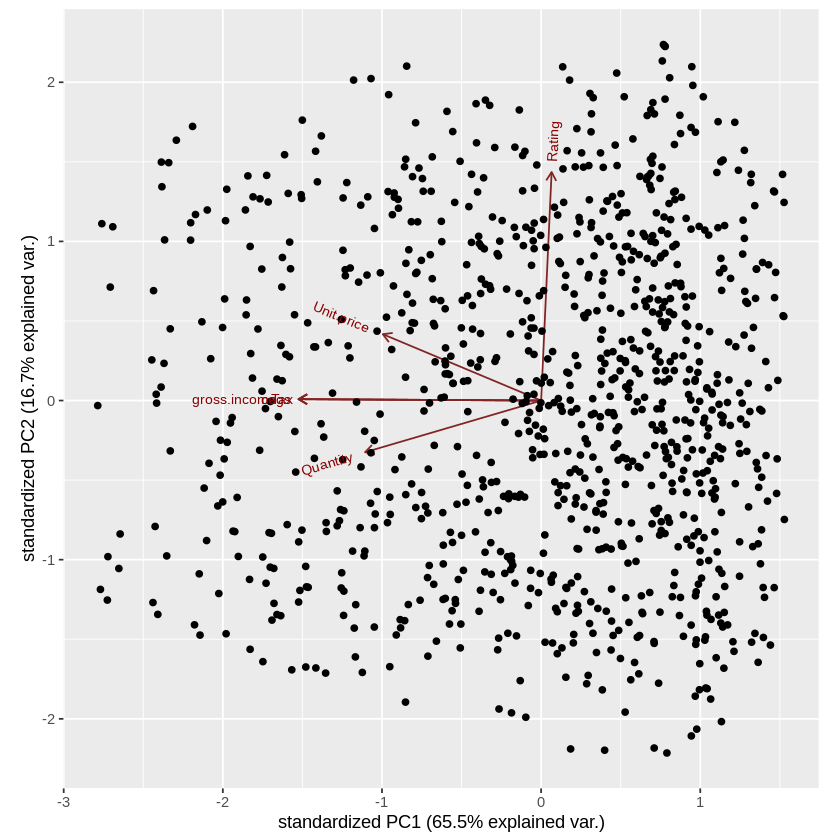

In [ ]:
#  loading libraries
library(devtools)
install_github("vqv/ggbiplot")
library(ggbiplot)
# plotting PCA results
ggbiplot(data.pca ,groups=data$branch) 


# **PART 2**

**Part 2 - Feature Selection**

In [ ]:
# Loading neccesary libraries for filter methods and feature ranking

install.packages("caret")
library(caret)
install.packages("wskm")
library(wskm)
install.packages("cluster")
library(cluster)


In [ ]:
# Calculating the correlation matrix
# 
correlationMatrix <- cor(data)

In [ ]:
# Find attributes that are highly correlated
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.60)

# Highly correlated attributes
highlyCorrelated
names(data[,highlyCorrelated])

[1] 3 4 5

[1] "Tax"          "cogs"         "gross.income"

In [ ]:
# removing the variables with a higher correlation
# 
data<-data[-highlyCorrelated]

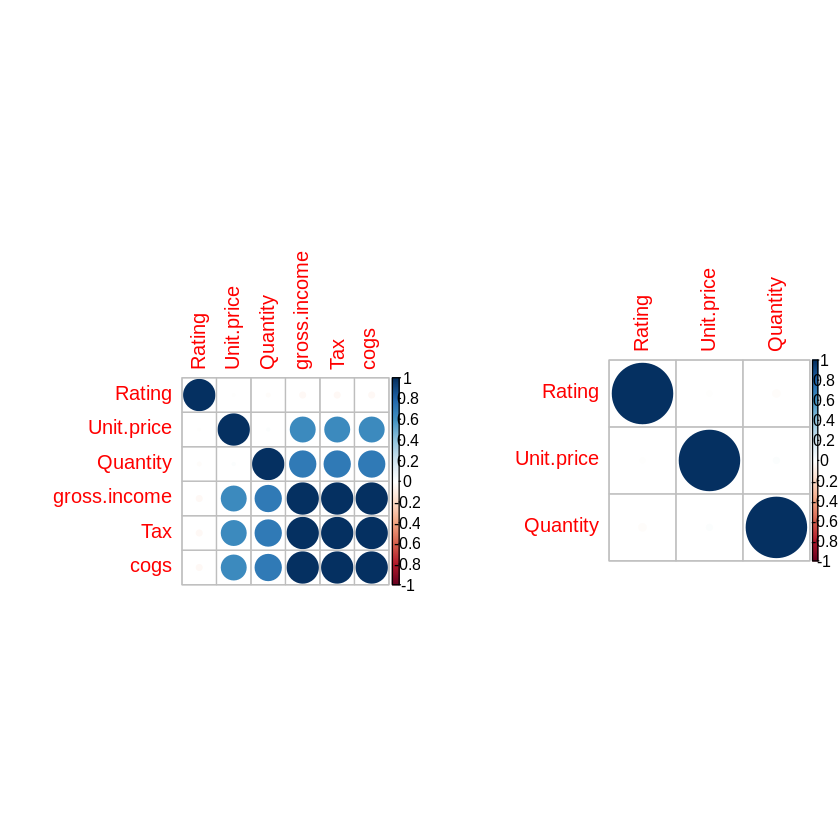

In [ ]:
# Performing our graphical comparison
#
par(mfrow = c(1, 2))
corrplot(correlationMatrix, order = "hclust")
corrplot(cor(data), order = "hclust")

## **INSIGHTS**

  **Part 1**
- Branch is C is performing well overall
- the supermarket has more customers for Fashion and Accessories followed by those for Food & Beverages
- most preffered method of payment is ewallets
- More women customers buy Health & Beauty Product and Fashion & Accessories
- Branch B performs poorly in Food & Beverages, Home & Lifestyle products
- There is high correlation between cogs, income and tax correlated.
- Lastly, according to the analysis; quantity, gross income, unit price and rating hold the most information

**Part 2**
Tax, cogs and gross income are highly correlated therefore my conclusion is we can choose one and eliminate the other two.